In [2]:
import db_service as dbs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import csv
import openpyxl


# Pripojeni k databazi

In [3]:
client = dbs.connect_db()

Password:········
Successfully conected to the database.


In [4]:
data = client["db"]["rocenky"]
data_book = client['db']['plem_knihy']

In [4]:
# for x in data.find({'Druh' : 'Lemur vari'}, {'_id' : 0, 'Druh' : 1, 'Rok' : 1}):
#     print(x)

# Informace o databazi
## Druhy lemuru, ZOO, roky

In [5]:
# for field in ['Zoo', 'Druh', 'Rok']:
#     dbs.print_unique(data, field)

## Ukladani

In [6]:
out_opt = dbs.OUT_OPT_DEF

## Pocet zive narozenych mladat za vsechny roky dle ZOO
### Lemur kata

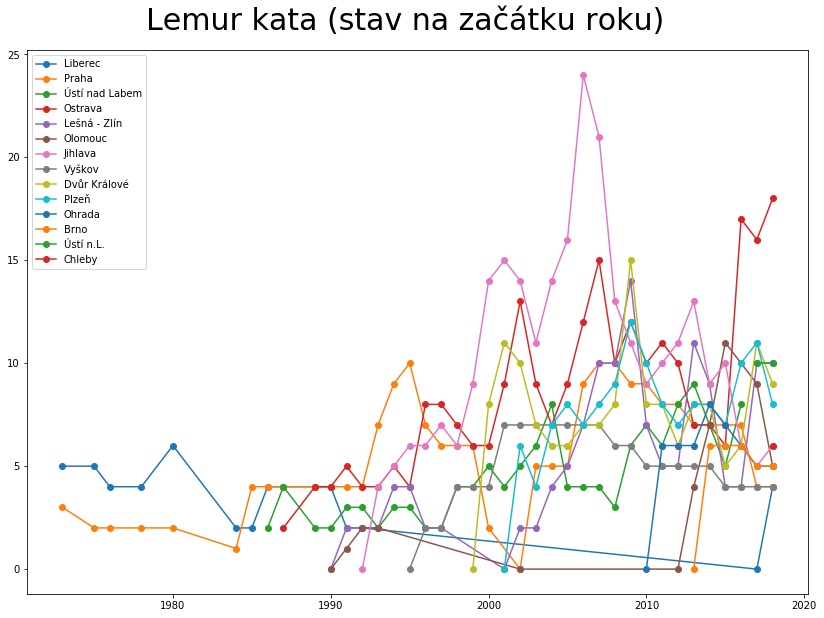

In [17]:
dbs.plot_all_zoo_rok(data, 'Lemur kata', 'stav_start')

## Porodnost pro Prahu

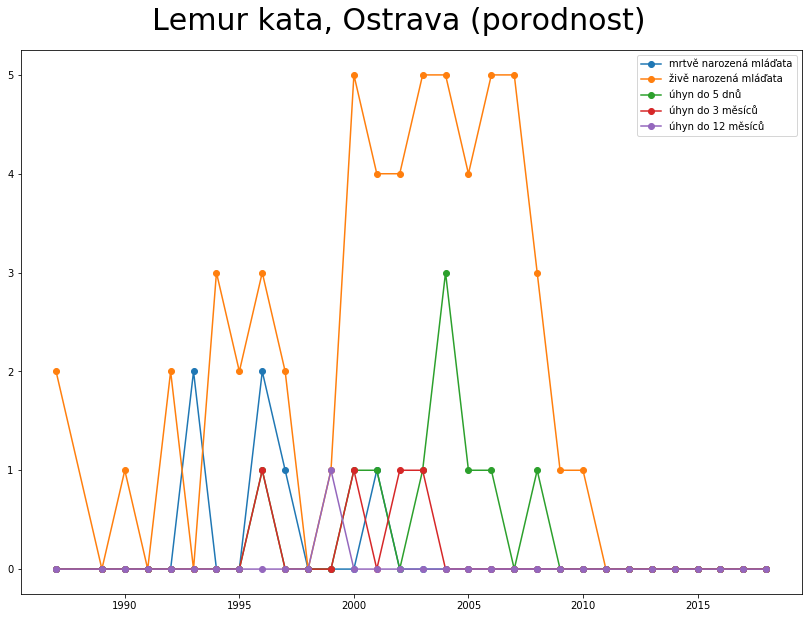

In [20]:
out_opt['suptitle'] = 'porodnost'
cats = ['mrtve_nar_mlad', 'zive_nar_mlad', 'uhyn_do_5d', 'uhyn_do_3m', 'uhyn_do_12m']
dbs.plot_one_zoo_rok(data, 'Lemur kata', 'Ostrava', cats, out_opt)

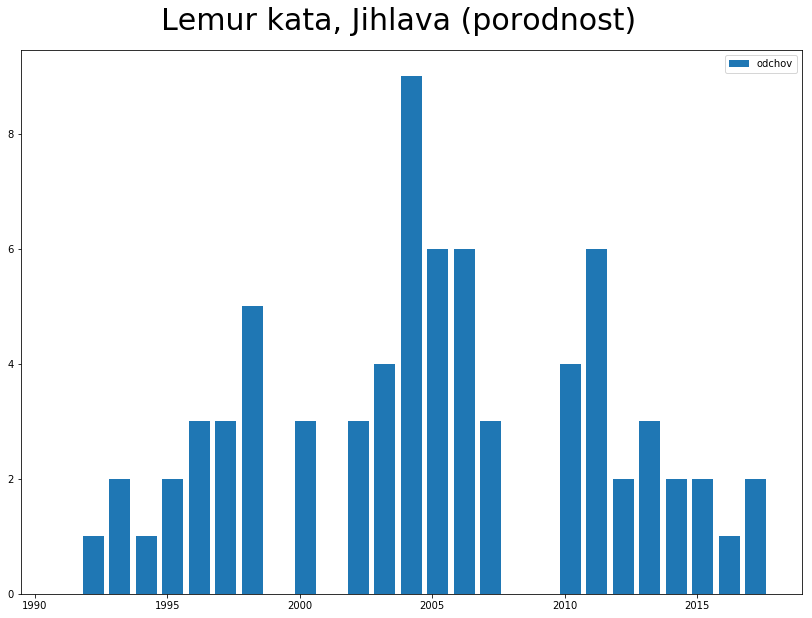

In [21]:
out_opt['suptitle'] = 'porodnost'
cats = ['odchov']
dbs.plot_one_zoo_rok(data, 'Lemur kata', 'Jihlava', cats, out_opt, bar=True)

In [16]:
list(data.aggregate([
    # first stage, filtruj na druhy a zoo
    {"$match" : {'Zoo' : 'Jihlava', 'Druh' : 'Lemur kata'}},
    
    # second stage, porodnost za roku
    {"$group" : {"_id" : "$Rok", "y" : {"$sum" : {"$reduce" : {"input" : "$odchov", "initialValue" : 0, "in"}}}}}
]))

OperationFailure: $reduce requires 'in' to be specified

## Porodnost přes všechny ZOO

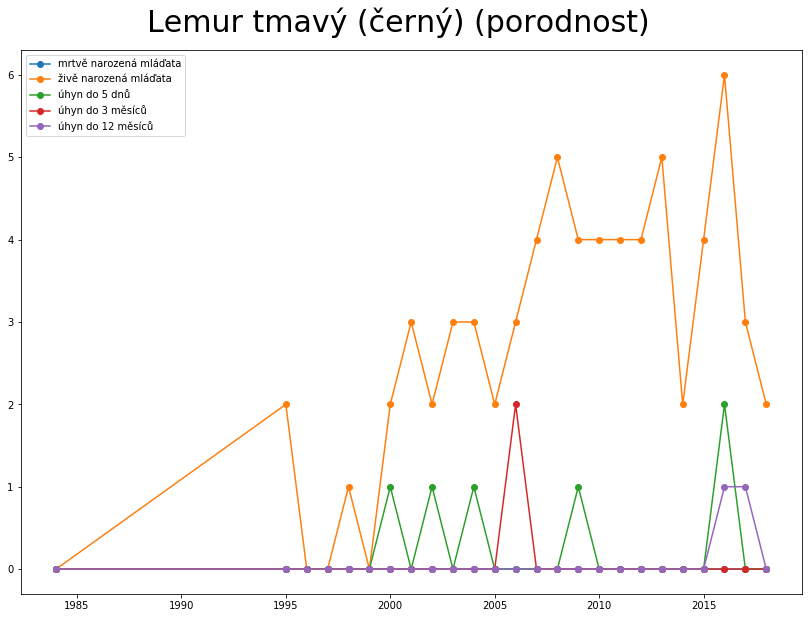

In [22]:
out_opt['suptitle'] = 'porodnost'
cats = ['mrtve_nar_mlad', 'zive_nar_mlad', 'uhyn_do_5d', 'uhyn_do_3m', 'uhyn_do_12m']
dbs.plot_cats_rok(data, 'Lemur tmavý (černý)', cats, out_opt)

## Porodnost přes všechny ZOO a vsechny druhy

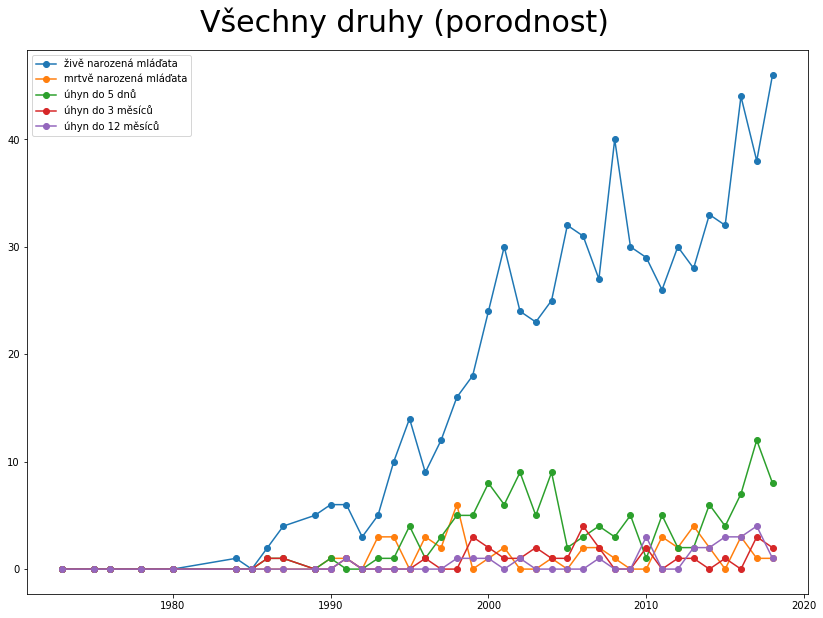

In [23]:
out_opt['suptitle'] = 'porodnost'
cats = ['zive_nar_mlad', 'mrtve_nar_mlad', 'uhyn_do_5d', 'uhyn_do_3m', 'uhyn_do_12m']
dbs.plot_cats_rok(data, None, cats, out_opt)

## Druhy lemurů chovaných k 1.1. daného roku v českých zoologických zahradách v letech 1973-2017

In [57]:
filename = "druhy_lemuru_stav_start.csv"
cats = ["stav_start.samec", "stav_start.samice", "stav_start.nezname"]

dbs.create_table(filename, data, *cats)

## Odchov mláďat lemurů v českých zoologických zahradách v letech 1973-2017

In [66]:
filename = "druhy_lemuru_odchov.csv"
cats = ["odchov.samec", "odchov.samice", "odchov.nezname"]

dbs.create_table(filename, data, *cats)

## Mrtve narozena

In [67]:
filename = "druhy_lemuru_mrtve.csv"
cats = ["mrtve_nar_mlad.samec", "mrtve_nar_mlad.samice", "mrtve_nar_mlad.nezname"]

dbs.create_table(filename, data, *cats)

## Zive narozena

In [68]:
filename = "druhy_lemuru_zive.csv"
cats = ["zive_nar_mlad.samec", "zive_nar_mlad.samice", "zive_nar_mlad.nezname"]

dbs.create_table(filename, data, *cats)

# Plemenne knihy

In [23]:
otci = dbs.get_otce(data_book)
filename = "lemur_kata_potomstvo.csv"
dbs.create_table_potomstva(data_book, filename, otci)

In [22]:
otci[0]

{'_id': 69,
 'pocet_potomku': 13,
 'potomci': [{'cislo': 70,
   'jmeno': 'UNK',
   'vek': {'rok': 0, 'mesic': 0, 'dny': 0},
   'matka': 'Fiana',
   'pohlavi': 'M',
   'narozen': '13.03.2016',
   'odchod': '13.03.2016',
   'poznamka': 'Smrt'},
  {'cislo': 71,
   'jmeno': 'Regi Grace',
   'vek': {'rok': 1, 'mesic': 10, 'dny': 17},
   'matka': 'Glorie',
   'pohlavi': 'F',
   'narozen': '15.03.2016',
   'odchod': '01.02.2018',
   'poznamka': ''},
  {'cislo': 72,
   'jmeno': 'Wilda Mia',
   'vek': {'rok': 1, 'mesic': 6, 'dny': 5},
   'matka': 'Marty',
   'pohlavi': 'F',
   'narozen': '17.03.2016',
   'odchod': '22.08.2017',
   'poznamka': ''},
  {'cislo': 73,
   'jmeno': 'Greta Flora',
   'vek': {'rok': 2, 'mesic': 11, 'dny': 0},
   'matka': 'Mada',
   'pohlavi': 'F',
   'narozen': '19.03.2016',
   'odchod': '',
   'poznamka': 'neodešel'},
  {'cislo': 74,
   'jmeno': 'Kili Po',
   'vek': {'rok': 1, 'mesic': 5, 'dny': 17},
   'matka': 'Paja',
   'pohlavi': 'F',
   'narozen': '05.04.2016',
  

# Vytvoreni a reset databaze

In [6]:
# dbs.create_database()

## reset hesla

In [5]:
# import pymongo
# from getpass import getpass

# user = 'admin'
# db_a = client['admin']

# db_a.command("updateUser", user, pwd=getpass(prompt='Password:'))

## smaz vsechny zaznamy

In [13]:
print('Rocenky: ', data.delete_many({}).deleted_count)
print('Plemenne knihy: ', data_book.delete_many({}).deleted_count)

2010


## import dat - rocenky

In [14]:
a_file = "/home/michal/Dropbox/Diplomka Monca/rocenky_pro_py.csv"
str_list = [0,1]
dbs.import_data(data, a_file, dbs.SETTINGS_ROCENKY, str_list)

Vlozeno 1005 zaznamu.


## import dat - plemenne knihy

In [20]:
a_file = "/home/michal/Dropbox/Diplomka Monca/rocenky_pro_py.csv"
str_list = [1, 2, 3, 4, 5, 9, 10, 11]
druh = 'Lemur kata'
dbs.import_data(data_book, a_file, dbs.SETTINGS_KNIHY, str_list, druh=druh)

Vlozeno 82 zaznamu.


# Testing openpyxl

In [5]:
xlsx_file = "/home/michal/Dropbox/Diplomka Monca/souhrn_vse.xlsx"
wb = openpyxl.load_workbook(xlsx_file)
sheet = wb['rocenky']

In [25]:
def get_keys(sheet):
    """ assumed row '1' and '2' are headers """
    key = None
    all_keys = []
    all_subkeys = []
    for cell in sheet['1']:
        # get key, only for 'Cell'
        # for merged cells, keep last key
        if type(cell).__name__ == 'Cell':
            key = cell.value
        
        # check for subkeys
        subcell = sheet['2'][cell.column - 1]
        subkey = subcell.value
        
        # save key and subkey (None means no subkey)
        all_keys.append(key)
        all_subkeys.append(subkey)

    return all_keys, all_subkeys

    

In [40]:
def get_doc_from_row(row, all_keys, all_subkeys):
    # ignore rows starting with empty cell
    if row[0].value is None:
        return None
    
    # check lenghts
    if len(set([len(row), len(all_keys), len(all_subkeys)])) != 1:
        print("Bad lenghts of field!")
        return None
    
    # go through each cell
    doc = {}
    for cell, key, subkey in zip(row, all_keys, all_subkeys):
        value = cell.value if cell.value is not None else 0
        # no subkeys
        if subkey is None:
            doc[key] = value
        # subkey
        else:
            doc.setdefault(key, {})
            doc[key][subkey] = value
            
    return doc
        

In [45]:
def get_all_data(sheet):
    all_keys, all_subkeys = get_keys(sheet)
    all_docs = []
    
    for row in sheet[3:sheet.max_row-1]:
        doc = get_doc_from_row(row, all_keys, all_subkeys)
        if doc is not None:
            all_docs.append(doc)
            
    return all_docs

In [46]:
all_docs = get_all_data(sheet)

In [49]:
all_docs[567]

{'Druh': 'Lemur tmavý (černý)',
 'Zoo': 'Praha',
 'Rok': 2009,
 'stav k 1.1. ': {'samec': 4, 'samice': 3, 'neznámé': 0},
 'příchody': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'odchody': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'úhyny': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'jiné úbytky': {'samec': 0, 'samice': 0},
 'potraty': 0,
 'porody': 1,
 'úhyn gravid. Samic': 0,
 'mrvě narozená mláďata': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'živě narozená mláďata': {'samec': 1, 'samice': 1, 'neznámé': 0},
 'do 5 dnů': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'do 3 měsíců': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'do konce roku': {'samec': 0, 'samice': 0, 'neznámé': 0},
 'odchov': {'samec': 1, 'samice': 1, 'neznámé': 0},
 'deponace': {'samec': 1, 'samice': 2, 'neznámé': 0},
 'stav k 31.12.': {'samec': 4, 'samice': 2, 'neznámé': 0}}

((<Cell 'rocenky'.A3>,
  <Cell 'rocenky'.B3>,
  <Cell 'rocenky'.C3>,
  <Cell 'rocenky'.D3>,
  <Cell 'rocenky'.E3>,
  <Cell 'rocenky'.F3>,
  <Cell 'rocenky'.G3>,
  <Cell 'rocenky'.H3>,
  <Cell 'rocenky'.I3>,
  <Cell 'rocenky'.J3>,
  <Cell 'rocenky'.K3>,
  <Cell 'rocenky'.L3>,
  <Cell 'rocenky'.M3>,
  <Cell 'rocenky'.N3>,
  <Cell 'rocenky'.O3>,
  <Cell 'rocenky'.P3>,
  <Cell 'rocenky'.Q3>,
  <Cell 'rocenky'.R3>,
  <Cell 'rocenky'.S3>,
  <Cell 'rocenky'.T3>,
  <Cell 'rocenky'.U3>,
  <Cell 'rocenky'.V3>,
  <Cell 'rocenky'.W3>,
  <Cell 'rocenky'.X3>,
  <Cell 'rocenky'.Y3>,
  <Cell 'rocenky'.Z3>,
  <Cell 'rocenky'.AA3>,
  <Cell 'rocenky'.AB3>,
  <Cell 'rocenky'.AC3>,
  <Cell 'rocenky'.AD3>,
  <Cell 'rocenky'.AE3>,
  <Cell 'rocenky'.AF3>,
  <Cell 'rocenky'.AG3>,
  <Cell 'rocenky'.AH3>,
  <Cell 'rocenky'.AI3>,
  <Cell 'rocenky'.AJ3>,
  <Cell 'rocenky'.AK3>,
  <Cell 'rocenky'.AL3>,
  <Cell 'rocenky'.AM3>,
  <Cell 'rocenky'.AN3>,
  <Cell 'rocenky'.AO3>,
  <Cell 'rocenky'.AP3>,
  <Cell 'rocenky'.